<a href="https://colab.research.google.com/github/Charan91120/Data_science_final_project/blob/main/financialSentimentAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as fsa_pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
fsa_data = fsa_pd.read_csv('/content/drive/MyDrive/data.csv')

In [7]:
fsa_data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [8]:
fsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [9]:
fsa_data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [10]:
import warnings as fsa_wgs
fsa_wgs.filterwarnings("ignore")

In [11]:
print("Duplicate Rows :", fsa_data.duplicated().values.sum())

Duplicate Rows : 6


In [12]:
fsa_data = fsa_data.drop_duplicates()
print("Financial Sentiment Analysis without duplicates: ", fsa_data.shape)

Financial Sentiment Analysis without duplicates:  (5836, 2)


In [13]:
fsa_data['Sentiment'].value_counts()

Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder as fsa_lb

In [15]:
# Initialize LabelEncoder
label_encoder = fsa_lb()

# Fit and transform the 'Sentiment' column
fsa_data['Sentiment'] = label_encoder.fit_transform(fsa_data['Sentiment'])


* positive -2
* negative -0
* neutral -1

In [16]:
fsa_data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


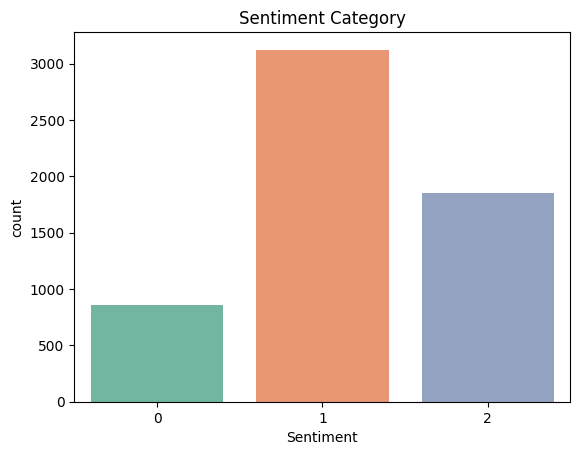

In [17]:
import seaborn as fsa_sn
import matplotlib.pyplot as fsa_mpl

fsa_sn.countplot(x ='Sentiment', data = fsa_data, palette = 'Set2')
fsa_mpl.title('Sentiment Category')
fsa_mpl.show()

In [18]:
import nltk as fsa_ttrtn
fsa_ttrtn.download('stopwords')
import regex as fsa_ttrtr
from nltk.corpus import stopwords as fsa_ttrts
fsa_ttrts = fsa_ttrts.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
fsa_ttrtn.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer as fsa_wordnet
fsa_lemmatizer = fsa_wordnet() ## Using Lemmatizer NLP Technique

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
## Stopwards rejection ,Lemmatization
def senti_cat(fut):
    fut = fut.lower()
    # Use re.sub for substitution
    fut = fsa_ttrtr.sub("[^a-z]+", " ", fut)
    fut = " ".join([futd for futd in fut.split() if futd not in fsa_ttrts])
    fut=' '.join([fsa_lemmatizer.lemmatize(j) for j in fut.split()])
    return fut

In [21]:
STOP=[]
for ohg in fsa_data['Sentence']:
    STOP.append(senti_cat(ohg))

In [22]:
fsa_data['Sentence']=STOP
fsa_data

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,2
1,esi low bk real possibility,0
2,last quarter componenta net sale doubled eur e...,2
3,according finnish russian chamber commerce maj...,1
4,swedish buyout firm sold remaining percent sta...,1
...,...,...
5837,rising cost forced packaging producer huhtamak...,0
5838,nordic walking first used summer training meth...,1
5839,according shipping company viking line eu deci...,1
5840,building home improvement trade sale decreased...,1


In [23]:
fsa_data.to_csv('fsa_preprocessed_data.csv', index = False)